# &emsp;&emsp;竞赛建模一般流程：        
- **Stage 1.业务背景解读与数据探索**      
    &emsp;&emsp;在拿到数据的第一时间，需要对数据（也就是对应业务）的基本背景进行解读。由于任何数据都诞生于某业务场景下，同时也是根据某些规则来进行的采集或者计算得出，因此如果可以，我们应当尽量去了解数据诞生的基本环境和对应的业务逻辑，尽可能准确的解读每个字段的含义，而只有在无法获取真实业务背景时，才会考虑退而求其次通过数据情况去倒推业务情况。        
    &emsp;&emsp;当然，在进行了数据业务背景解读后，接下来就需要对拿到的数据进行基本的数据探索。一般来说，数据探索包括数据分布检验、数据正确性校验、数据质量检验、训练集/测试集规律一致性检验等。当然，这里可能涉及到的操作较多，也并非所有的操作都必须在一次建模过程中全部完成。     
- **Stage 2.数据预处理与特征工程**       
    &emsp;&emsp;在了解了建模业务背景和基本数据情况后，接下来我们就需要进行实际建模前的数据准备工作了，也就是数据预处理（数据清洗）与特征工程。其中，数据清洗主要聚焦于数据集数据质量提升，包括缺失值、异常值、重复值处理，以及数据字段类型调整等；而特征工程部分则更倾向于调整特征基本结构，来使数据集本身规律更容易被模型识别，如特征衍生、特殊类型字段处理（包括时序字段、文本字段等）等。        
    &emsp;&emsp;当然，很多时候我们并不刻意区分数据清洗与特征工程之间的区别，很多时候数据清洗的工作也可以看成是特征工程的一部分。同时，也有很多时候我们也不会一定要求在不同阶段执行不同操作，例如如果在数据探索时发现缺失值比例较小，则可以直接对其进行均值/众数填补，而不用等到特征工程阶段统一处理，再例如很多特征工程的方法需要结合实际建模效果来判别，所以有的时候特征衍生也会和建模过程交替进行。     
- **Stage 3.算法建模与模型调优**        
    &emsp;&emsp;在经过一系列准备工作后，就将进入到最终建模环节了，建模过程既包括算法训练也包括参数调优。建模工作是一个后验的过程，需要反复尝试各种模型、各种调参方法、以及模型融合方法。此外，很多时候我们也需要根据最终模型输出结果来进行数据预处理和特征工程相关方法调整。

In [5]:
'''
@Title   :   信用评分期末分享
@Time    :   2023/12/18
@Author  :   2021 金融科技 王佳晨
'''
X_test = pd.read_excel(r'D:\\资料\\信用评分\\testX.xlsx')
X_train = pd.read_excel(r"D:\\资料\\信用评分\\trainX.xlsx")
y_train = pd.read_excel(r'D:\\资料\\信用评分\\trainY.xlsx')

X_train["X5"] =  X_train["X5"].str[:-5].astype(float)
X_test["X5"] =  X_test["X5"].str[:-5].astype(float)

X_train["X3"] =  X_train["X3"].astype(str)
X_test["X3"] =  X_test["X3"].astype(str)

print('Size of X1_test', X_test.shape)
print('Size of X1_train', X_train.shape)
print('y_train',y_train.shape)

Size of X1_test (4000, 83)
Size of X1_train (6000, 83)
y_train (6000, 2)


# 观察数据结构及内容

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 83 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   客户编号    6000 non-null   int64  
 1   X1      6000 non-null   int64  
 2   X2      6000 non-null   object 
 3   X3      6000 non-null   object 
 4   X4      6000 non-null   object 
 5   X5      6000 non-null   float64
 6   X6      6000 non-null   object 
 7   X7      5852 non-null   float64
 8   X8      0 non-null      float64
 9   X9      5852 non-null   float64
 10  X10     5852 non-null   object 
 11  X11     5852 non-null   float64
 12  X12     5852 non-null   float64
 13  X13     5852 non-null   float64
 14  X14     5852 non-null   float64
 15  X15     0 non-null      float64
 16  X16     5852 non-null   float64
 17  X17     5852 non-null   float64
 18  X18     5852 non-null   float64
 19  X19     5852 non-null   float64
 20  X20     5852 non-null   float64
 21  X21     4806 non-null   float64
 22  

In [7]:
X_train.head()

客户编号  X1       X2        X3  X4      X5 X6        X7  X8        X9  \
0  57204  24  C221501  520000.0  B9  3129.0  C -0.260927 NaN  0.273161   
1  57205  32  C422222  340000.0  A2  2786.0  C -0.260927 NaN  0.273161   
2  57206  25  C311181  130000.0  B9  2161.0  C -0.260927 NaN -1.530778   
3  57207  48  C322102  230000.0  B9  2915.0  C  3.745289 NaN  1.405408   
4  57208  25  C103703  410000.0  B9  2937.0  C  3.976507 NaN  0.273161   

      X10       X11       X12       X13       X14  X15       X16       X17  \
0  G113.0 -0.027469  1.355933  0.273161 -0.552645  NaN  1.355933  0.273182   
1  G113.0 -0.027469  1.444054  0.273161 -0.552645  NaN  1.444054  0.273182   
2  G111.0 -0.027469  0.705215 -1.530778 -0.552645  NaN  0.705215 -1.530773   
3  G115.0 -0.027469 -1.655100  1.405408  2.047848  NaN -1.655100  1.405404   
4  G113.0 -0.027469 -0.618463  0.273161  2.047848  NaN -0.618463  0.273182   

        X18       X19       X20       X21  X22  X23  X24  X25  X26  X27  X28  \
0 -0.382809  0.226721  1.187110       NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0   
1 -0.382809  0.226721  1.187110  0.650712  NaN  1.0  NaN  NaN  NaN  1.0  NaN   
2 -0.382809  0.226721 -0.330457  0.420287  3.0  1.0  NaN  NaN  1.0  1.0  3.0   
3  2.860706  0.226721  1.187110       NaN  2.0  NaN  NaN  1.0  NaN  1.0  3.0   
4  2.621419  0.226721  1.187110       NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN   

   X29  X30  X31  X32  X33       X34       X35  X36       X37  X38  X39  \
0  NaN  NaN  1.0  NaN  NaN       NaN       NaN  NaN -0.277691  NaN  NaN   
1  NaN  NaN  NaN  NaN  2.0  0.829951 -0.739729  NaN -0.277691  NaN  NaN   
2  3.0  4.0  2.0  NaN  1.0  0.157279  1.498995  NaN -0.277691  NaN  NaN   
3  NaN  1.0  NaN  1.0  1.0 -1.710664 -1.469981  NaN -0.277691  NaN  NaN   
4  NaN  NaN  NaN  NaN  NaN  0.575117 -1.469981  NaN -0.277691  NaN  NaN   

       X40       X41       X42       X43       X44       X45       X46  \
0 -0.02316 -0.040714 -0.040714       NaN       NaN       NaN       NaN   
1 -0.02316 -0.040714 -0.040714 -1.258766 -0.394425 -0.079205  0.533084   
2 -0.02316 -0.040714 -0.040714       NaN       NaN       NaN       NaN   
3 -0.02316 -0.040714 -0.040714  0.860463 -0.394425 -0.765719 -0.828564   
4 -0.02316 -0.040714 -0.040714  1.209998 -0.027710 -0.522981  0.943218   

        X47       X48       X49       X50  X51       X52      X53       X54  \
0       NaN       NaN       NaN -1.451083  NaN -0.320821  0.22997 -0.406642   
1  0.589023  1.139043  0.751138  0.834669  NaN  0.602224  0.22997  0.781419   
2       NaN       NaN       NaN -0.814503  NaN -0.320821  0.22997  0.263979   
3 -0.066975  1.707628  1.371719 -1.234727  NaN -1.163793  0.22997 -1.429766   
4  0.150178  0.878011  0.751138 -1.234727  NaN -1.163793  0.22997 -1.457321   

        X55       X56       X57       X58       X59       X60       X61  \
0 -0.384526 -0.387958 -0.292626 -0.293794 -0.604712  1.054973 -0.067364   
1 -0.384526 -0.387958 -0.292626 -0.293794 -0.437917 -1.294928  0.520418   
2 -0.384526 -0.387958 -0.292626 -0.293794 -0.677681  0.264097  0.066125   
3 -0.384526 -0.387958 -0.292626 -0.293794  0.307287  1.504443 -1.221959   
4 -0.384526 -0.387958 -0.292626 -0.293794 -1.598179 -1.294928 -1.541627   

        X62       X63       X64       X65       X66       X67       X68  \
0  0.319400  0.169453  0.373153  1.500566  0.543862  1.137665 -0.202644   
1  1.026009  0.930239  1.079999  0.451336 -0.489102 -0.222099  0.479203   
2  1.161299  0.672239  1.215334  0.451336 -0.489102 -0.222099 -0.107150   
3 -0.557344 -1.108838 -0.503884  0.451336 -0.489102 -0.222099 -1.350160   
4 -1.539199 -1.515274 -1.512890 -1.614543 -1.530098 -1.520664 -1.593589   

        X69       X70       X71       X72       X73       X74       X75  \
0 -0.367843 -0.382334 -0.385057 -0.095040 -0.052512 -0.388019       NaN   
1 -0.367843  0.277092 -0.385057  0.852680  0.247972 -0.388019  0.428493   
2 -0.367843 -0.293388 -0.385057 -0.207822 -1.124954 -0.388019  0.006138   
3 -0.367843 -1.410048 -0.385057 -1.3

In [8]:
X_test.head()

客户编号  X1       X2        X3  X4      X5 X6        X7  X8        X9  \
0  63204  34  C124524  610000.0  A2  2037.0  C -0.260927 NaN -1.199770   
1  63205  38  C305185  130000.0  B9  2020.0  C -0.260927 NaN -1.199770   
2  63206  29  C112322  510000.0  A1  2314.0  C -0.260927 NaN -1.199770   
3  63207  24  C132022  510000.0  B9  3613.0  C -0.260927 NaN  1.405408   
4  63208  23  C102122  210000.0  B9  3123.0  C -0.260927 NaN -1.199770   

      X10       X11       X12       X13       X14  X15       X16       X17  \
0  G114.0 -0.027469 -0.763486 -1.199770 -0.552645  NaN -0.763486 -1.199809   
1  G114.0 -0.027469  1.522950 -1.199770 -0.552645  NaN  1.522950 -1.199809   
2  G114.0 -0.027469 -0.999159 -1.199770 -0.552645  NaN -0.999159 -1.199809   
3  G115.0 -0.027469 -0.096268  1.405408 -0.552645  NaN -0.096268  1.405404   
4  G114.0 -0.027469 -1.510285 -1.199770  1.512372  NaN -1.510285 -1.199809   

        X18       X19       X20       X21  X22  X23  X24  X25  X26  X27  X28  \
0 -0.382809  0.226721  1.187110  1.156816  1.0  1.0  NaN  2.0  NaN  NaN  2.0   
1 -0.382809  0.226721 -1.505308 -1.316492  NaN  NaN  NaN  NaN  NaN  NaN  2.0   
2 -0.382809  0.226721  0.442924       NaN  1.0  NaN  1.0  NaN  NaN  NaN  1.0   
3 -0.382809  0.226721 -0.731334       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4 -0.382809  0.226721 -1.505308  1.098928  2.0  NaN  2.0  NaN  6.0  NaN  NaN   

   X29  X30  X31  X32  X33       X34       X35       X36       X37       X38  \
0  2.0  1.0  2.0  1.0  1.0 -0.915030 -0.739729       NaN -0.277691       NaN   
1  1.0  NaN  NaN  NaN  1.0 -0.362307  1.311116  0.269558  3.601080 -0.790471   
2  2.0  1.0  2.0  NaN  NaN -1.237019 -0.739729       NaN -0.277691       NaN   
3  NaN  NaN  NaN  NaN  1.0  1.187313  1.311116       NaN -0.277691       NaN   
4  NaN  NaN  2.0  2.0  1.0       NaN       NaN       NaN -0.277691       NaN   

        X39      X40       X41       X42       X43       X44       X45  \
0       NaN -0.02316 -0.040714 -0.040714 -0.880337 -0.394425 -0.195818   
1  1.158464 -0.02316 -0.040714 -0.040714  0.034160 -0.884746 -0.522981   
2       NaN -0.02316 -0.040714 -0.040714 -1.149735 -0.394425 -0.361017   
3       NaN -0.02316 -0.040714 -0.040714 -0.585382 -1.108546 -1.403615   
4       NaN -0.02316 -0.040714 -0.040714       NaN       NaN       NaN   

        X46       X47       X48       X49       X50  X51       X52       X53  \
0  0.419463 -0.231868 -0.290326  0.554626  0.082191  NaN -1.163793  0.229970   
1 -1.309550 -1.357268 -1.328453 -1.356454 -0.624464  NaN -0.320821  0.229970   
2 -0.022369 -0.089353 -0.317168 -0.659259  1.375580  NaN  1.661662  0.229970   
3  0.386022 -0.750632 -0.414018 -0.239151 -1.451083  NaN -1.708734 -4.348348   
4       NaN       NaN       NaN       NaN -1.451083  NaN -0.320821  0.229970   

        X54       X55       X56       X57       X58       X59       X60  \
0 -1.004169 -0.384526 -0.387958 -0.292626 -0.293794 -0.080066  1.376730   
1  0.358359 -0.384526 -0.387958 -0.292626 -0.293794 -0.889965  0.517880   
2  0.307127 -0.384526 -0.387958 -0.292626 -0.293794  1.093688 -1.294928   
3 -1.658744 -0.384526 -0.387958 -0.292626 -0.293794 -1.681257 -1.694556   
4 -0.973623 -0.384526 -0.387958 -0.292626 -0.293794 -0.437917  0.264097   

        X61       X62       X63       X64       X65       X66       X67  \
0 -0.947633  0.026897 -0.670898  0.080553  0.451336 -0.489102 -0.222099   
1  0.462094  0.832569  0.813244  0.886494 -0.481619 -0.489102 -0.757058   
2 -0.118072 -0.981215 -0.669349 -0.927896  0.451336  0.946933  0.619171   
3 -1.541627 -1.539199 -1.515274 -1.512890 -1.614543 -1.530098 -1.520664   
4 -0.930276 -0.234250 -0.776661 -0.180681 -0.415829 -0.489102 -0.716292   

        X68       X69       X70       X71       X72       X73       X74  \
0 -1.188693 -0.367843 -1.277535 -0.385057 -1.142153  0.247972 -0.388019   
1  0.387567  2.629072  1.111420 -0.385057  0.459378  0.929556 -0.388019   
2  0.526568 -0.367843  0.324597 -0.385057 -0.754854 -0.563581 -0.388019   


# 数据缺失值检验

In [9]:
missing_data(X_train)

Total     Percent
X15   6000  100.000000
X8    6000  100.000000
X51   5864   97.733333
X36   5025   83.750000
X38   5025   83.750000
X39   5025   83.750000
X80   4906   81.766667
X81   4250   70.833333
X79   4244   70.733333
X31   2894   48.233333
X30   2884   48.066667
X27   2846   47.433333
X26   2814   46.900000
X32   2795   46.583333
X25   2795   46.583333
X24   2775   46.250000
X23   2762   46.033333
X22   2743   45.716667
X29   2739   45.650000
X28   2731   45.516667

In [10]:
missing_data(X_test)

Total  Percent
X15   4000  100.000
X8    4000  100.000
X51   3934   98.350
X36   3372   84.300
X38   3372   84.300
X39   3372   84.300
X80   3267   81.675
X81   2819   70.475
X79   2809   70.225
X30   1925   48.125
X31   1917   47.925
X25   1871   46.775
X29   1867   46.675
X23   1865   46.625
X27   1856   46.400
X26   1853   46.325
X32   1845   46.125
X22   1842   46.050
X24   1831   45.775
X28   1782   44.550

In [11]:
y_train.head()

客户编号  活跃客户
0  57204     1
1  57205     1
2  57206     0
3  57207     0
4  57208     0

### 结合数据字典区分离散型变量和连续型变量

In [12]:
X_train.select_dtypes('object').columns

Index(['X2', 'X3', 'X4', 'X6', 'X10'], dtype='object')

# 数据探索

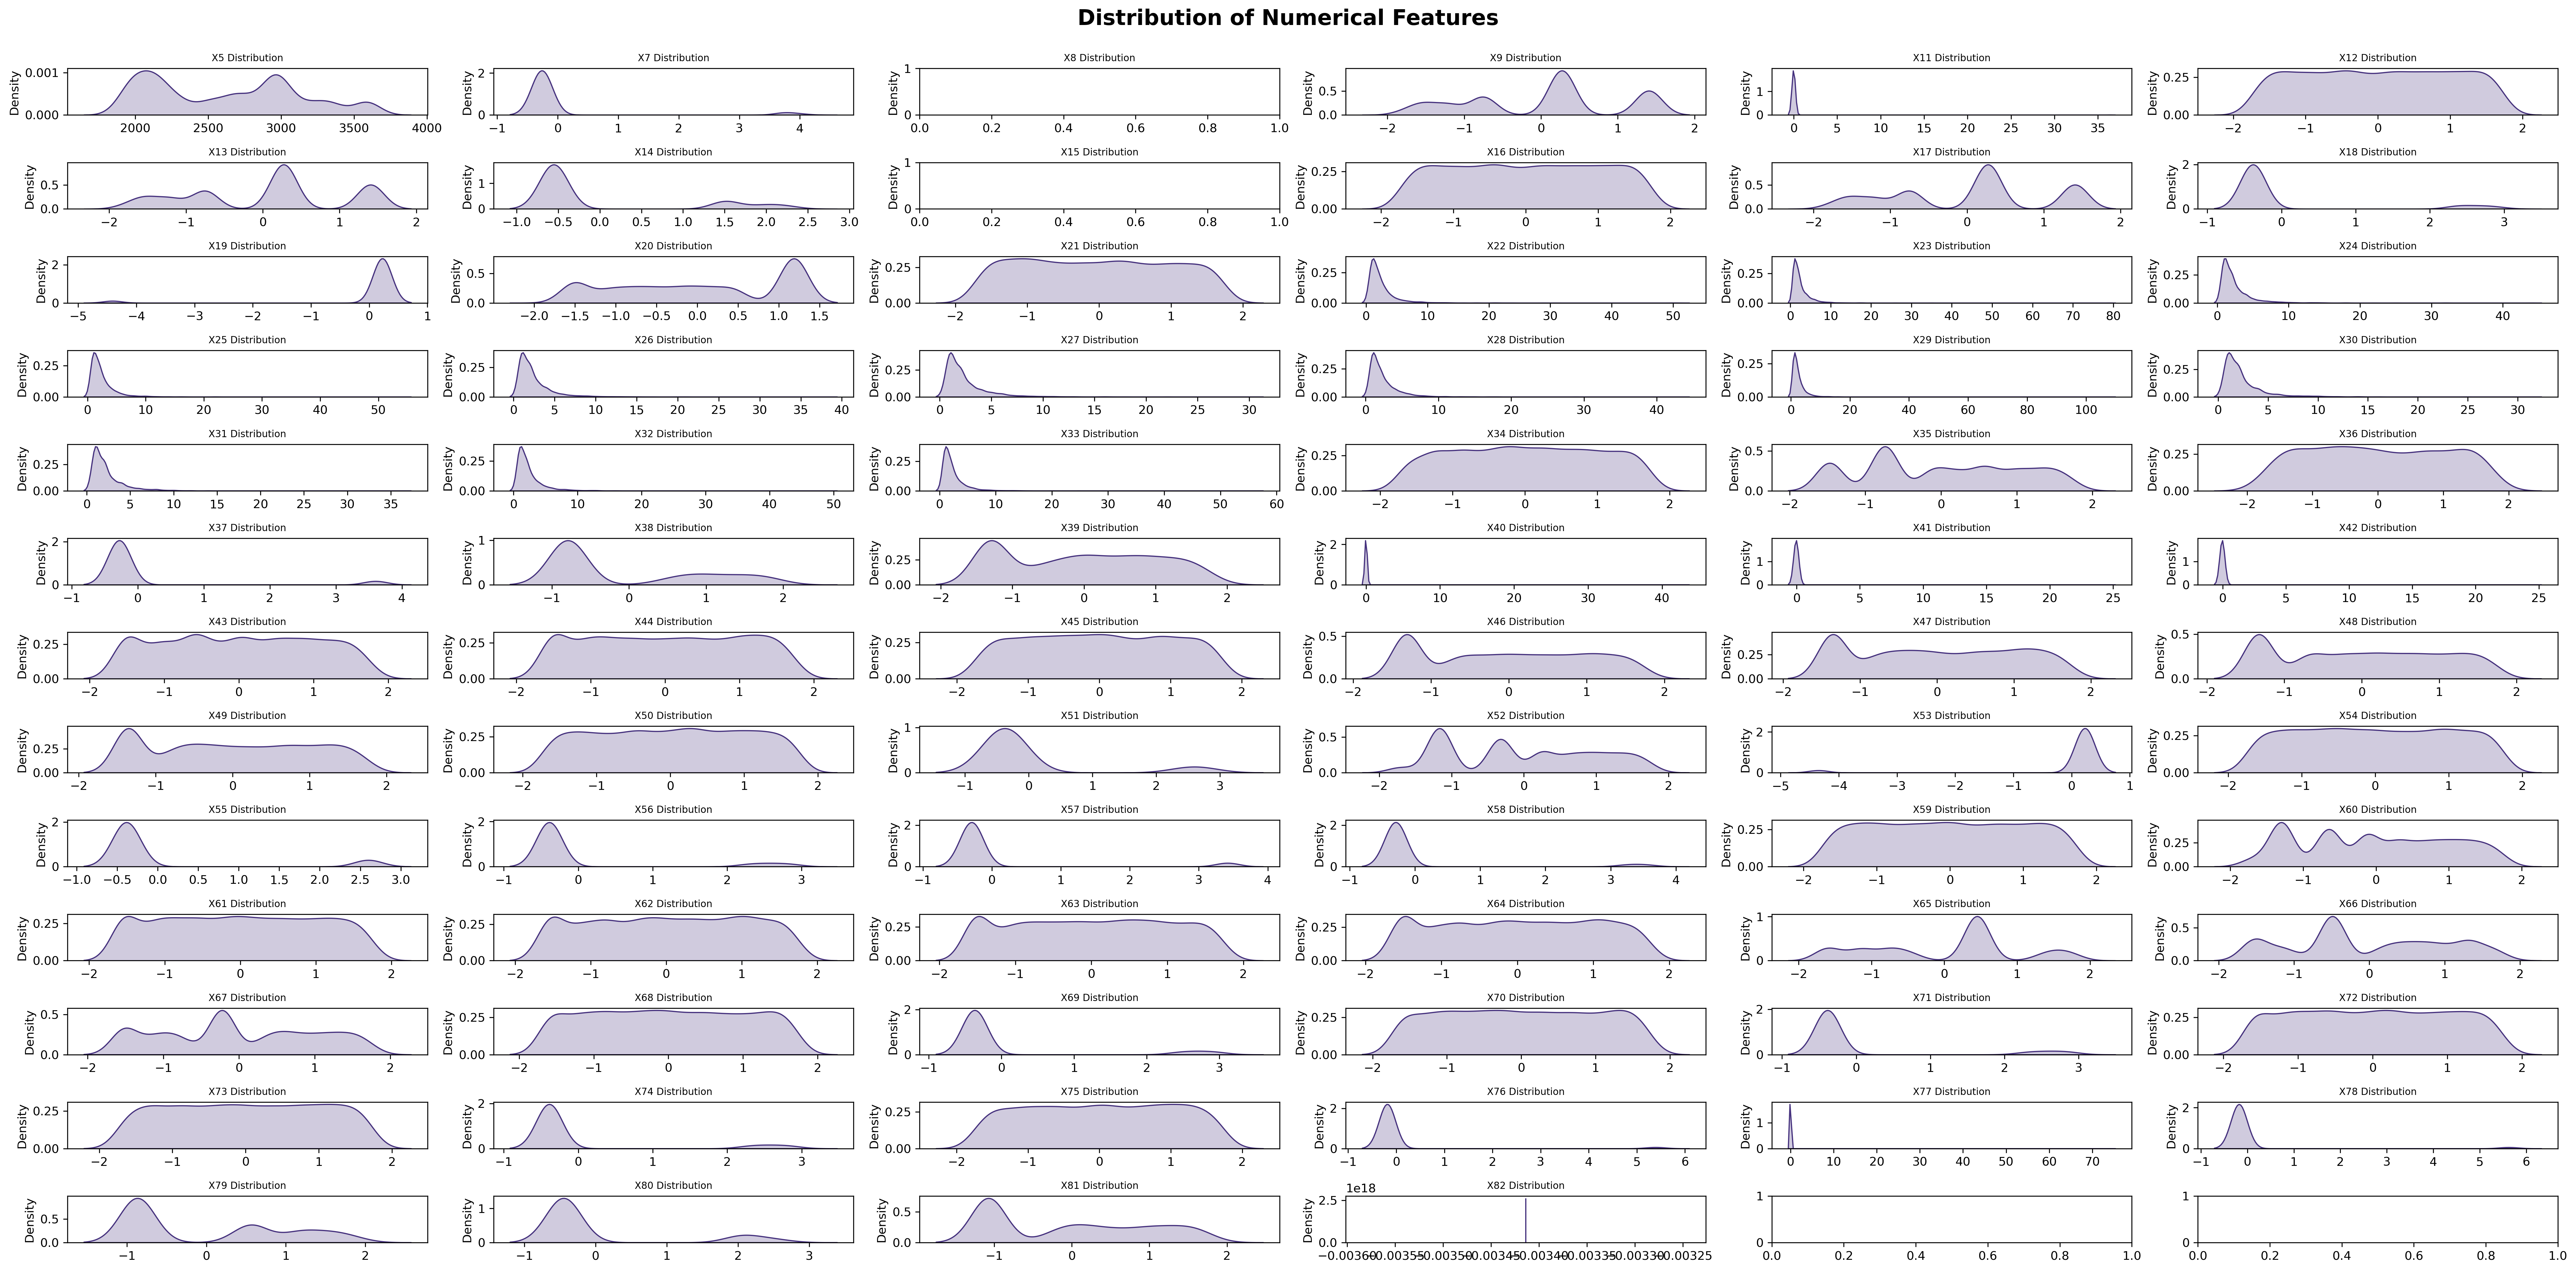

In [13]:
plot_distribution(X_train,13,6)

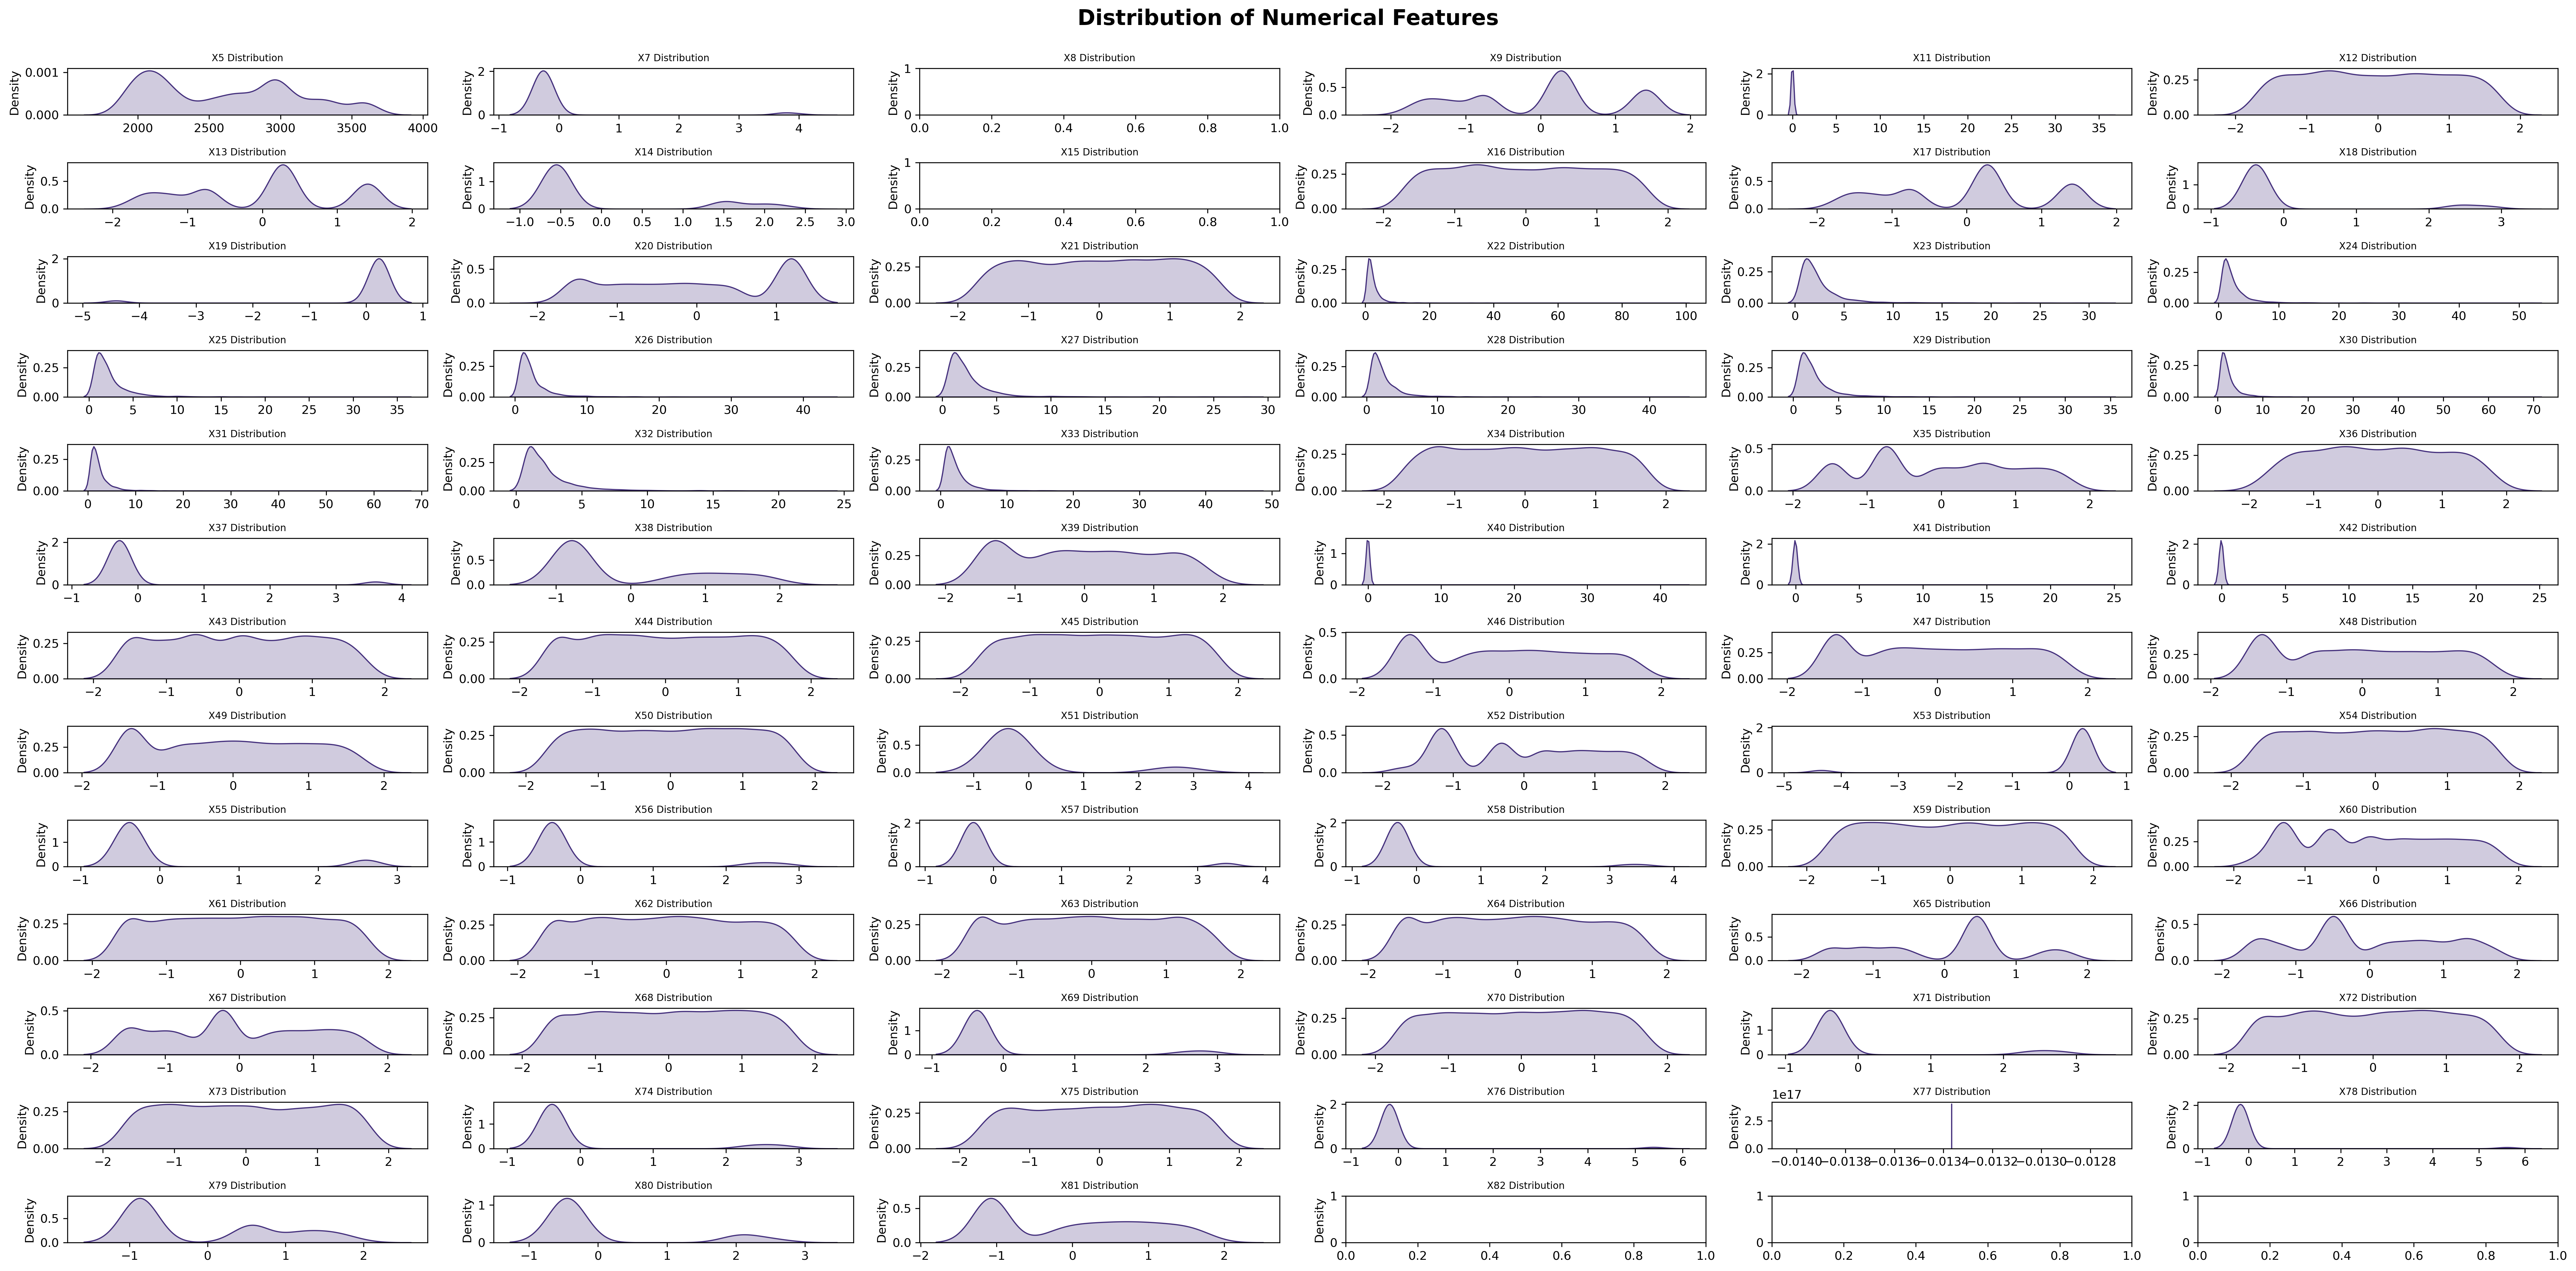

In [14]:
plot_distribution(X_test,13,6)

In [15]:
plot_pie(X_train,'X2')

In [16]:
plot_pie(X_train,'X4')

In [17]:
plot_pie(X_train,'X5')

In [18]:
plot_pie(X_train,'X6')

In [19]:
plot_pie(X_train,'X10')

In [20]:
plot_pie(X_train,'X22')

In [21]:
plot_pie(y_train,'活跃客户')

In [22]:
plot_hist_target(X_train,'X1')

In [23]:
plot_hist_target(X_train,'X10')

<Figure size 640x480 with 0 Axes>

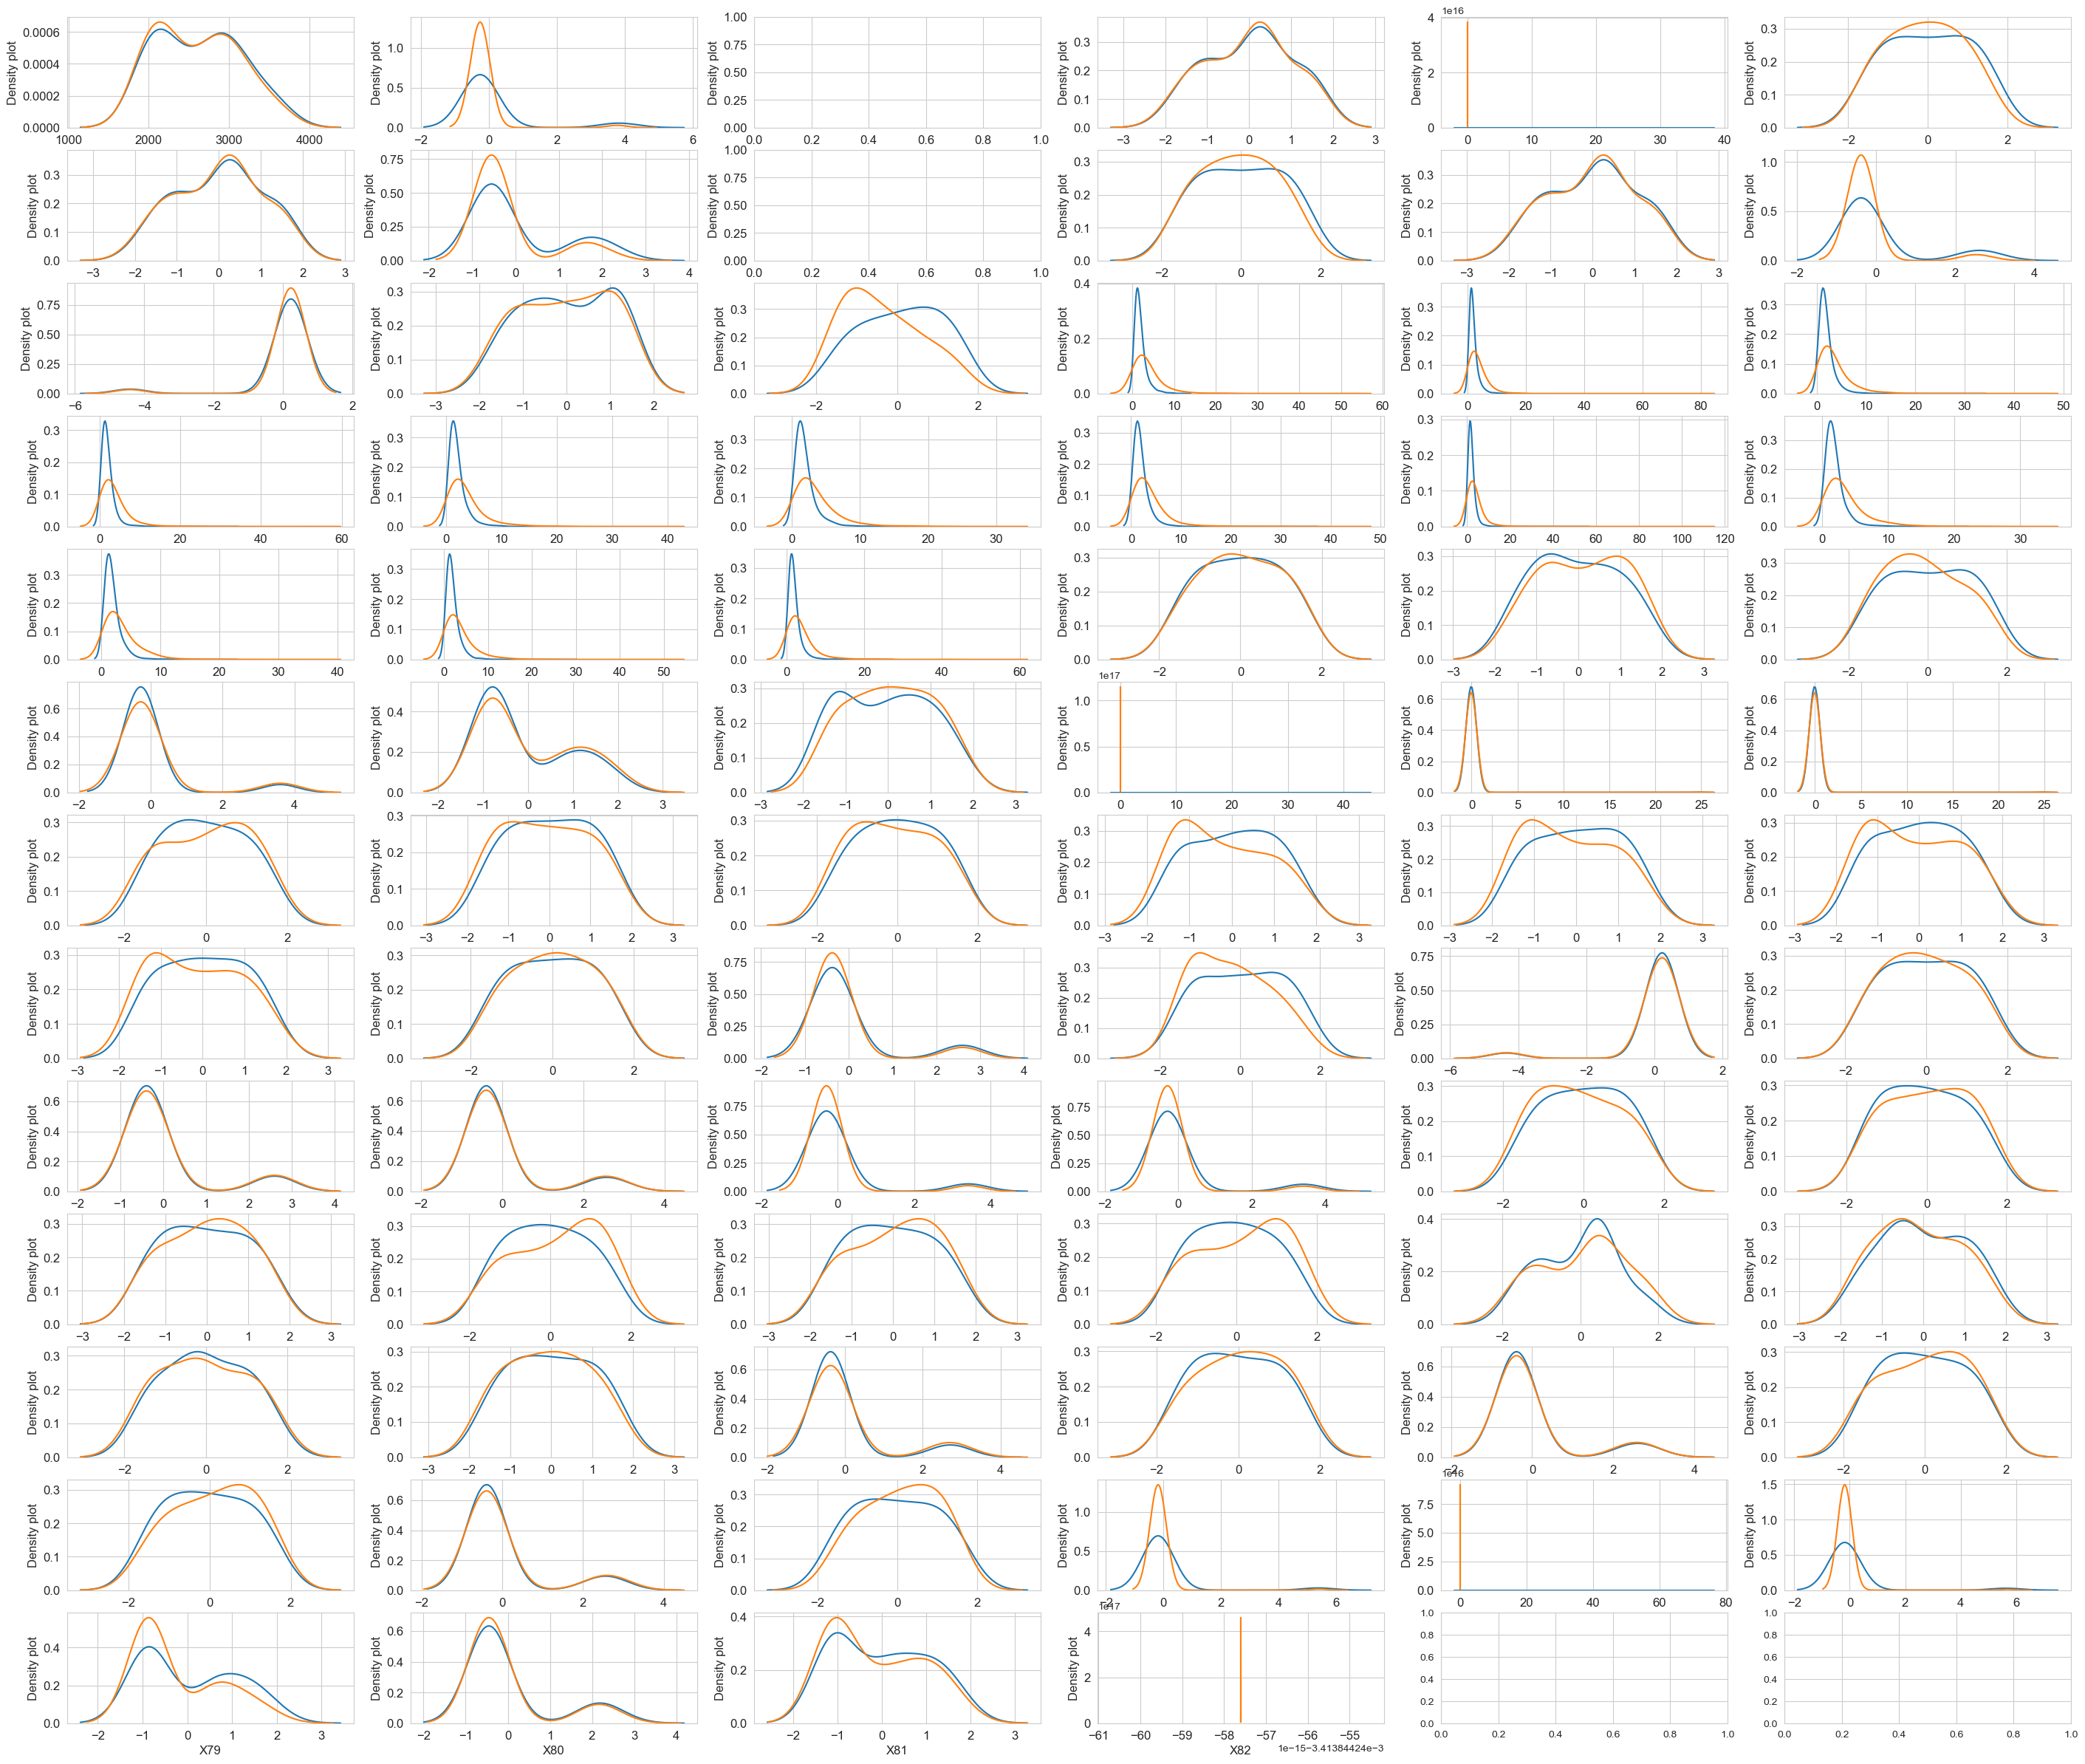

In [24]:
plot_distribution_comp(X_train,13,6)

In [25]:
pearson_matrix(X_train)

# 离散字段的数据重编码
需要注意的是，不同类型的字段由不同的编码方式，例如文本类型字段可能需要用到CountVector或TF-IDF处理、时序字段可能需要分段字典排序等，并且，不同模型对于数据编码类型要求也不一样，例如逻辑回归需要对多分类离散变量进行哑变量变换，而CatBoost则明确要求不能对离散字段字段进行哑变量变换、否则会影响模型速度和效果。所以需要根据后续实际模型要求选择不同编码方式对数据进行处理。

## OrdinalEncoder自然数排序

<center><img src="https://i.loli.net/2021/11/12/v5Y8OeJKgkIruNy.png" alt="image-20211112170651500" style="zoom:33%;" />

## OneHotEncoder独热编码

<center><img src="https://i.loli.net/2021/11/12/MP9g8LuAxN3iJBo.png" alt="image-20211112170705622" style="zoom:33%;" />

## 连续字段的特征变换
对连续变量而言，标准化可以消除量纲影响并且加快梯度下降的迭代效率，而归一化则能够对每条数据进行进行范数单位化处理。

sklearn中的归一化其实是分为标准化（Standardization）和归一化（Normalization）两类。例如Z-Score标准化和0-1标准化，都属于Standardization的范畴，而在sklearn中，Normalization则特指针对单个样本（一行数据）利用其范数进行放缩的过程。

## 连续变量分箱

连续字段的离散过程如下所示：

<center><img src="https://i.loli.net/2021/11/14/lzYso4NxZnRdywH.png" alt="image-20211114220948438" style="zoom:33%;" />
    


连续变量的离散过程也可以理解为连续变量取值的重新编码过程，在很多时候，连续变量的离散化也被称为连续变量分箱。需要注意的是，离散之后字段的含义将发生变化。连续字段的离散化能够更加简洁清晰的呈现特征信息，并且能够极大程度减少异常值的影响，同时也能够消除特征量纲影响，最重要的一点是对于很多线性模型来说，连续变量的分箱实际上相当于在线性方程中引入了非线性的因素，从而提升模型表现。当然连续变量的分箱过程会让连续变量损失一些信息，而对于其他很多模型来说（例如树模型），分箱损失的信息则大概率会影响最终模型效果。

#### 分箱方法主要分为：等宽分箱、等频分箱、聚类分箱、有监督分箱

# 特征衍生与特征筛选

&emsp;&emsp;所谓特征衍生，指的是通过既有数据进行新特征的创建，特征衍生有时也被称为特征创建、特征提取等。总体来看，特征衍生有两类方法，其一是依据数据集特征进行新特征的创建，此时的特征衍生其实是一类无监督的特征衍生;而另外一种情况是将数据集标签情况也纳入进行考虑来创建新的特征，此时特征衍生其实是有监督的特征衍生，如通过决策树的建模结果对连续变量进行分箱（分箱后的列也是创建的新的一列，只是有时我们会将其替换原始列）。在大多数时候特征衍生特指无监督特征衍生，而有监督的特征衍生我们会称其为目标编码。

无论是特征衍生还是目标编码，实现的途径都可以分为两种，其一是通过深入的数据背景和业务背景分析，进行人工字段合成，这种方法创建的字段往往具有较强的业务背景与可解释性，同时也会更加精准、有效的提升模型效果，但缺点是效率较慢，需要人工进行分析和筛选，其二则是抛开业务背景，直接通过一些简单暴力的工程化手段批量创建特征，然后从海量特征池中挑选有用的特征带入进行建模，这种方法简单高效，但工程化方法同质化严重，在竞赛时虽是必备手段，但却难以和其他同样采用工程化手段批量创建特征的竞争者拉开差距。因此在实际应用时，往往是先通过工程化方法批量创建特征提升模型效果，然后再围绕当前建模需求具体问题具体分析，尝试人工创建一些字段来进一步提升模型效果。

## 特征筛选的重要性

过多的特征会影响模型的训练速度，但实际上，冗余无用的特征也是会影响最终模型结果的，尤其是决策树以及以树模型为基础的集成学习。其实从严格的算法原理层面来说，冗余无用的特征是并不会影响树模型的建模流程的，但包括sklearn在内的诸多机器学习框架，为了更快速的找到合适的树模型的生长切分点，往往会采用一种更加模糊的搜索方式，也就是说，每次树的生长并不一定是选择那个最优的切分点，而此时，冗余无用的特征就会影响最终模型预测结果。也就是说，某些时候，模型会选择冗余无用特征提供的次优切分点进行树的生长。尽管冗余特征对精度的影响并不会特别大，往往也就是在万分位上的差别，但在很多追求模型精度的场景下，万分位的差距也是很大的优化空间。因此对特征进行筛选，就不仅仅是一项提高模型训练速度的事项，更是一项提升模型结果的策略，也就是一项模型优化的策略。

<center><img src="https://s2.loli.net/2022/01/22/jyYBXTRvHSNluIJ.png" alt="image-20220122122112626" style="zoom:33%;" />

<center><img src="https://s2.loli.net/2022/01/22/gANubs8OwQ256Dd.png" alt="特征衍生方法" style="zoom:33%;" />

In [26]:
X_train_fill,X_test_fill=data_pipeline_fill(r'D:\\资料\\信用评分\\trainX.xlsx',
                             r'D:\\资料\\信用评分\\testX.xlsx',
                             r'D:\\资料\\信用评分\\trainY.xlsx')

数据处理成功，耗时：13.30秒


## 模型融合


**泛化误差是模型在未知数据集上的误差，更低的泛化误差是所有机器学习/深度学习建模的根本目标**。在机器学习当中，泛化误差一般被认为由偏差、方差和噪音构成。其中偏差是预测值与真实值之间的差异，衡量模型的精度。方差是模型在不同数据集上输出的结果的方差，衡量模型稳定性。噪音是数据收集过程当中不可避免的、与数据真实分布无关的信息。

当算法是回归算法、且模型衡量指标是MSE时，模型的泛化误差可以有如下定义：

$$\begin{aligned} 泛化误差 &= 偏差^2 + 方差 + 噪音^2 \\\\

&= bias^2 + variance + noise^2 \end{aligned}$$

**模型融合的基本思想是借助弱评估器之间的“独立性”来降低方差**，从而降低整体的泛化误差。这个思想可以被推广到任意并行使用弱分类器的算法或融合方式上，极大程度地左右了并行融合方式的实际使用结果。其中，**“降低方差”指的是模型融合的输出结果的方差一定小于弱评估器输出结果的方差**，因此在相同数据上，多模型融合往往比单模型更加稳定，也因此多模型的泛化能力往往比单模型更强。

假设现在有$n$个弱评估器，任意弱评估器上的输出结果是$X_i$，则所有这些弱评估器输出结果的方差可以被表示为Var($X_i$)。假设现在我们执行回归任务，则输出结果等于所有弱评估器输出结果的平均值，其输出可以被表示为$\bar{X} = \frac{\sum{X_i}}{n}$，因此融合输出结果的方差可以被表示为Var($\bar{X}$)，也可以写作Var($\frac{\sum{X_i}}{n}$)。

在数学上我们很容易证明：

**<center><font color="red">当弱评估器互相独立时，Var($\boldsymbol{\bar{X}}$)永远小于Var($\boldsymbol{X_i}$)</font></center>**


假设任意弱评估器输出的方差Var($X_i$) = $\sigma^2$，则有：

$$\begin{aligned}
Var(\bar{X}) &= Var\left(\frac{1}{n}\sum_{i=1}^{n}X_i\right)\\
&= \frac{1}{n^2}Var\left(\sum_{i=1}^{n}X_i\right)\\
&= \frac{1}{n^2} \left( Var(X_1) + Var(X_2) + ... + Var(X_n) \right)\\
&= \frac{1}{n^2}n\sigma^2\\
&= \frac{\sigma^2}{n}
\end{aligned}$$

当$n$为正整数、且弱评估器之间相互独立时，必然有Var($\bar{X}$) 永远小于Var($X_i$)，这是模型融合的泛化能力总是强于单模型的根本原因。

In [27]:
result=Stacking_fusion(X_train_fill, y_train, X_test_fill)

[LightGBM] [Info] Number of positive: 1102, number of negative: 3098
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004239 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11891
[LightGBM] [Info] Number of data points in the train set: 4200, number of used features: 168
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[1]	training's auc: 0.819285	valid_1's auc: 0.750089
Training until validation scores don't improve for 10 rounds
[2]	training's auc: 0.843331	valid_1's auc: 0.768415
[3]	training's auc: 0.856743	valid_1's auc: 0.776355
[4]	training's auc: 0.867653	valid_1's auc: 0.782691
[5]	training's auc: 0.872807	valid_1's auc: 0.790139
[6]	training's auc: 0.875224	valid_1's auc: 0.794061
[7]	training's auc: 0.879422	valid_1's auc: 0.79664
[8]	training's auc: 0.882768	valid_1's auc: 0.799817
[9]	training's auc: 0.

In [28]:
result.head()

随机森林  LightGBM  CatBoost   XGBoost  Averaging  Stacking
0  0.816951  0.823593  0.831082  0.817876   0.832878  0.833765

## 竞赛Trick
伪标签、数据增强、逆向工程...